# Simulación de ML Notebooks

## 1. Librerias y configuraciones previas


In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Creacion de los modelos
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

#EvaluarModelos
import sklearn.metrics as metrics

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [ ]:
## Aqui se insertan las funciones propias
## =============================================================================

## 3. Carga del dataset

In [ ]:
d=pd.read_csv('./datasets/02_GermanCredit.csv')

In [ ]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive
#import os

#drive.mount('/gdrive')

In [ ]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer ID               1000 non-null   int64 
 1   checking_account_status   1000 non-null   object
 2   loan_duration_mo          1000 non-null   int64 
 3   credit_history            1000 non-null   object
 4   purpose                   1000 non-null   object
 5   loan_amount               1000 non-null   int64 
 6   savings_account_balance   1000 non-null   object
 7   time_employed_yrs         1000 non-null   object
 8   payment_pcnt_income       1000 non-null   int64 
 9   gender_status             1000 non-null   object
 10  other_signators           1000 non-null   object
 11  time_in_residence         1000 non-null   int64 
 12  property                  1000 non-null   object
 13  age_yrs                   1000 non-null   int64 
 14  other_credit_outstanding 

In [ ]:
d.head()

,Customer ID,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1


In [ ]:
#Borrando columnas innecesarias
d.drop(['Customer ID'], axis='columns', inplace=True)

In [ ]:
# Transformación del tipo de dato de la variable loan_amount
# realmente es un ejemplo dado que no es necesario porque la variable es originalmente numérica

d['loan_amount'] = pd.to_numeric(d['loan_amount'])

In [ ]:
#Verificación y eliminación de registros duplicados

#Verificación de registros duplicados
d.loc[d.duplicated()]

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit


In [ ]:
# eliminación de registros duplicados
d = d.drop_duplicates()

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

In [ ]:
#verificacion de completitud de los datos
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

checking_account_status 0
loan_duration_mo 0
credit_history 0
purpose 0
loan_amount 0
savings_account_balance 0
time_employed_yrs 0
payment_pcnt_income 0
gender_status 0
other_signators 0
time_in_residence 0
property 0
age_yrs 0
other_credit_outstanding 0
home_ownership 0
number_loans 0
job_category 0
dependents 0
telephone 0
foreign_worker 0
bad_credit 0


## 4. Visualización de datos

### Variables de entrada

In [ ]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head()

,checking_account_status,credit_history,purpose,savings_account_balance,time_employed_yrs,gender_status,other_signators,property,other_credit_outstanding,home_ownership,job_category,telephone,foreign_worker
0,< 0 DM,critical account - other non-bank loans,radio/television,unknown/none,>= 7 years,male-single,none,real estate,none,own,skilled,yes,yes
1,0 - 200 DM,current loans paid,radio/television,< 100 DM,1 - 4 years,female-divorced/separated/married,none,real estate,none,own,skilled,none,yes
2,none,critical account - other non-bank loans,education,< 100 DM,4 - 7 years,male-single,none,real estate,none,own,unskilled-resident,none,yes
3,< 0 DM,current loans paid,furniture/equipment,< 100 DM,4 - 7 years,male-single,guarantor,building society savings/life insurance,none,for free,skilled,none,yes
4,< 0 DM,past payment delays,car (new),< 100 DM,1 - 4 years,male-single,none,unknown-none,none,for free,skilled,none,yes


In [ ]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
d[numCols].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
0,6,1169,4,4,67,2,1,0
1,48,5951,2,2,22,1,1,1
2,12,2096,2,3,49,1,2,0
3,42,7882,2,4,45,1,2,0
4,24,4870,3,4,53,2,2,1


In [ ]:
#Se elimina el elemento Price de la lista de variables numéricas

numCols.remove('bad_credit')

### Variable de salida

In [ ]:
d.groupby('bad_credit').bad_credit.count().sort_values(ascending=False)

bad_credit
0    700
1    300
Name: bad_credit, dtype: int64

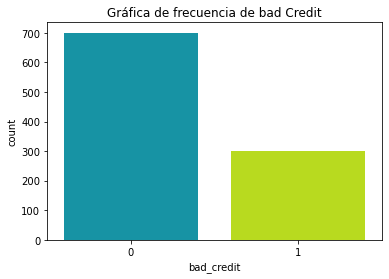

In [ ]:
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de bad Credit')
sns.countplot(x=d['bad_credit'], palette='nipy_spectral')

plt.show()

## 5. Preparación de datos

### Imputaciones

### Valores atípicos para las variables de entrada

### Transformaciones

### Creación de Variables Dummies

In [ ]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(d, drop_first=1)

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   loan_duration_mo                                        1000 non-null   int64
 1   loan_amount                                             1000 non-null   int64
 2   payment_pcnt_income                                     1000 non-null   int64
 3   time_in_residence                                       1000 non-null   int64
 4   age_yrs                                                 1000 non-null   int64
 5   number_loans                                            1000 non-null   int64
 6   dependents                                              1000 non-null   int64
 7   bad_credit                                              1000 non-null   int64
 8   checking_account_status_< 0 DM                          100

In [ ]:
d[['purpose_car (new)','purpose_car (used)']].head()

,purpose_car (new),purpose_car (used)
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


## 6. Creación del modelo

### Dividir el conjunto de datos

In [ ]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='bad_credit')
y = d['bad_credit']

In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

### Escalar Variables

In [ ]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents']


In [ ]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_train[num_vars].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
281,0.0357,0.2400,0.0000,1.0000,0.2321,0.0000,0.0000
42,0.2500,0.3276,0.3333,1.0000,0.4464,0.0000,1.0000
255,0.4643,0.1045,1.0000,0.3333,0.0893,0.0000,0.0000
906,0.3036,0.1933,0.3333,0.3333,0.0893,0.0000,0.0000
394,0.1429,0.0403,0.0000,1.0000,0.0000,0.0000,0.0000


### Creación del modelo

In [ ]:
# Creación del modelo randomForest con con 10 árboles y 5 niveles de profundidad

modelo1 = RandomForestClassifier(
            n_estimators =  10,
            max_features =  'auto',
            max_depth    =  5,
            criterion    = 'gini'
         )


# Entrenamiento del modelo

modelo1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='auto', n_estimators=10)

### Evaluación del modelo

In [ ]:
# Ejecución del modelo con los datos de test
y_pred = modelo1.predict(X_test)

print("Random Forest:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Random Forest: 0.71
              precision    recall  f1-score   support

           0       0.71      0.99      0.82       138
           1       0.75      0.10      0.17        62

    accuracy                           0.71       200
   macro avg       0.73      0.54      0.50       200
weighted avg       0.72      0.71      0.62       200



## 7. Afinando el modelo (tuning)

In [ ]:
# Creación del modelo randomForest con con 10 árboles y 5 niveles de profundidad

modelo2 = RandomForestClassifier(
            n_estimators =  10,
            max_features =  'auto',
            class_weight = "balanced",
            max_depth    =  5,
            criterion    = 'gini'
         )


# Entrenamiento del modelo

modelo2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='auto', n_estimators=10)

### Evaluación del modelo

In [ ]:
# Ejecución del modelo con los datos de test

y_pred2 = modelo2.predict(X_test)

print("Random Forest:",metrics.accuracy_score(y_test, y_pred2))
print(metrics.classification_report(y_test, y_pred2))

Random Forest: 0.74
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       138
           1       0.56      0.74      0.64        62

    accuracy                           0.74       200
   macro avg       0.71      0.74      0.72       200
weighted avg       0.77      0.74      0.75       200



## 8. Prueba

### Evaluar algunas instancias (o ejemplos)

In [ ]:
# Concatenar X_test y y_test
df_prep = pd.DataFrame(np.c_[X_test, y_test], columns= X_test.columns.tolist()+['bad_credit_Real'])

In [ ]:
# Generar una muestra de 10 ejemplos de df_prep
x_i = df_prep.sample(n=10)
x_i

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,checking_account_status_< 0 DM,checking_account_status_> 200 DM or salary assignment,checking_account_status_none,...,other_credit_outstanding_none,other_credit_outstanding_stores,home_ownership_own,home_ownership_rent,job_category_skilled,job_category_unemployed-unskilled-non-resident,job_category_unskilled-resident,telephone_yes,foreign_worker_yes,bad_credit_Real
20,0.5714,0.6679,0.0000,1.0000,0.3214,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000
48,0.1964,0.2792,0.0000,1.0000,0.2857,0.0000,0.0000,0.0000,0.0000,1.0000,...,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000
134,0.4643,0.1855,1.0000,1.0000,0.6786,0.3333,0.0000,1.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000
26,0.3571,0.2140,0.6667,0.6667,0.1429,0.3333,0.0000,0.0000,0.0000,1.0000,...,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000
43,0.0893,0.0645,0.6667,0.3333,0.1429,0.0000,0.0000,1.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000
78,0.3571,0.0706,1.0000,0.6667,0.3393,0.0000,0.0000,0.0000,0.0000,1.0000,...,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000
133,0.0536,0.1280,0.3333,0.3333,0.2857,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000
52,0.4643,0.1063,1.0000,1.0000,0.3036,0.3333,0.0000,0.0000,0.0000,0.0000,...,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000
74,0.3571,0.2156,1.0000,1.0000,0.1607,0.0000,0.0000,1.0000,0.0000,0.0000,...,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000
184,0.3571,0.4621,0.3333,0.3333,0.1429,0.3333,0.0000,0.0000,0.0000,1.0000,...,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000


In [ ]:
# Predecir los valores para la muestra x_i utilizando el modelo2
resultadoPredict =modelo2.predict(x_i.drop(columns ='bad_credit_Real'))
resultadoPredict

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [ ]:
# Convertir el array numpy resultadoPredic en un DataFrame de pandas
resultadoPredict_df = pd.DataFrame(resultadoPredict, columns=['bad_credit_Predict'])

In [ ]:
# Concatenar x_i con el DataFrame de las predicciones
concatenated_df = pd.concat([x_i.reset_index(drop=True), resultadoPredict_df], axis=1)

concatenated_df[['bad_credit_Real', 'bad_credit_Predict']]

,bad_credit_Real,bad_credit_Predict
0,1.0000,1
1,0.0000,0
2,0.0000,1
3,0.0000,0
4,1.0000,1
5,0.0000,0
6,0.0000,0
7,0.0000,0
8,0.0000,1
9,1.0000,1


In [ ]:
# Crear una nueva columna llamada 'Clasificación' basada en las predicciones y los valores reales
concatenated_df['Clasificación'] = np.where(concatenated_df['bad_credit_Real'] == concatenated_df['bad_credit_Predict'], \
                                            'Correcto', 'Incorrecto')

# Mostrar los resultados de la clasificación
concatenated_df[['bad_credit_Real', 'bad_credit_Predict', 'Clasificación']]

,bad_credit_Real,bad_credit_Predict,Clasificación
0,1.0000,1,Correcto
1,0.0000,0,Correcto
2,0.0000,1,Incorrecto
3,0.0000,0,Correcto
4,1.0000,1,Correcto
5,0.0000,0,Correcto
6,0.0000,0,Correcto
7,0.0000,0,Correcto
8,0.0000,1,Incorrecto
9,1.0000,1,Correcto
